# Sampling Distributions

Sampling distributions are probability distributions of a statistic obtained from population samples.

## The Law of Large Numbers

The law of large numbers states that if $n$ sample trials are taken of random variable $X$ with a population mean of $E[X]$, the mean of the observation of those samples $\bar{X_n} \rightarrow E[X]$ as $n \rightarrow \infty$. 

### Example

Let $X$ be the number of tails counted after 100 tosses of a fair coin. $E[X] = 100 * \frac{1}{2} = 50$, so we should expect the average number of tails after $n$ trials of 100 tosses to be about 50 as well. 

In [5]:
from random import randint

def get_avg_tails(n, tosses):
    avg_tails = 0
    for _ in range(n):
        for _ in range(tosses):
            if randint(0,1): 
                avg_tails += 1/n
    return round(avg_tails,1)

print(get_avg_tails(10, 100))

51.4


## The Central Limit Theorem

The Central Limit Theorem states that the mean values of samples taken from a dataset--no matter its distribution--will be normally distributed. The means will follow $N$ ~ $(\mu_0, \frac{\sigma_0^2}{n})$, where $n$ is the number of samples. The more samples taken from the original dataset and the larger the size of each sample, the more normally distributed the means will be. 

### Example

Let's test this out on 1000 random numbers with values ranging from 1 to 100:

Mean = 50.708
Variance = 827.4261621621622


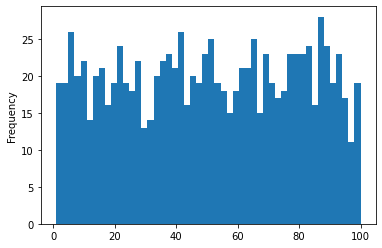

In [10]:
import matplotlib.pyplot as plt
import random
from statistics import mean, variance
%matplotlib inline

x = [random.randint(1, 100) for _ in range(0, 1000)]

print("Mean =", mean(x))
print("Variance =", variance(x))

plt.hist(x, bins=50)
plt.gca().set(ylabel='Frequency');

Now let's collect 50 random samples from the dataset, each with a size of 25, and plot their mean values:

Mean =  50.9384
Variance =  30.736993306122454


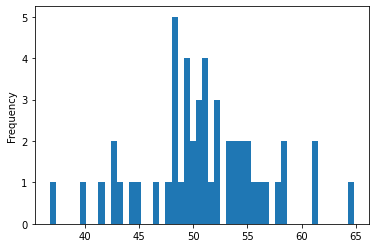

In [3]:
samples = [mean(random.sample(x, 25)) for _ in range(0, 50)]

print("Mean =", mean(samples))
print("Variance =", variance(samples))

plt.hist(samples, bins=50)
plt.gca().set(ylabel='Frequency');

The means look to be normally distributed. Also, the resulting mean and variance of this dataset are pretty close to expected.

## Maximum Likelihood Estimation

Maximum likelihood estimation (MLE) is a method that estimates the parameters of a probability distribution by maximizing a likelihood function. Its goal is optimally fit distributions to data.

### Example

*The German tank problem (also a true story from WWII): A German factory serializes tanks with distinct numbers from 1 to $n$, where $n$ is the total number of tanks manufactured. After the war, Allied intelligence gathers the serial numbers of $k$ captured German tanks, where $0 \leq k \leq n$. How can they estimate $n$?*

We can use MLE to estimate $n$ by taking the maximum serial number found among the $k$ captured German tanks; $M = \text{max}( X_1, X_2, \cdots, X_k)$. Let's simulate this 1000 times with $n = 1000$ and $k=50$:

Mean = 980.82
Variance = 354.62359999999995


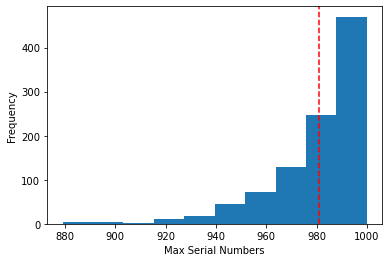

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_captured_tanks(n_sims, n, k):
    serial_nums = np.arange(1, n + 1)
    return [np.random.choice(serial_nums, k, replace=False) for _ in range(n_sims)] 

def plot_and_print(estimator):
    avg = np.mean(estimator)
    var = np.var(estimator)
    
    plt.hist(estimator)
    plt.axvline(x=avg, color='r', linestyle='--')
    plt.gca().set(ylabel='Frequency');
    plt.gca().set(xlabel='Max Serial Numbers');
    
    print("Mean =", avg)
    print("Variance =", var)

n, k = 1000, 50
sims = simulate_captured_tanks(1000, n, k)
mle = [max(sim) for sim in sims]
plot_and_print(mle)

Not a bad guess. However, this estimator is obviously biased since its outcome will always be less than or equal to $n$--which means we'll always be underestimating $n$. To improve this, notice how the mean $\rightarrow n$ as $k \rightarrow n$. This tells us that the spacing between ordered captured tank serial numbers is significant to estimating $n$. 

To make our estimator less biased, we can add the average spacing between ordered captured tanks to the MLE above. This is called the minimum variance unbiased estimator (MVUE). Due to the symmetry of random sampling, those gaps have the same expected length since they follow the same distribution. In each simulation, we have $k$ serial numbers ranging from 1 to $M$. Therefore, the average expected length of each gap is $\frac{M-k}{k}$.

Mean = 999.4363999999999
Variance = 368.9503934400001


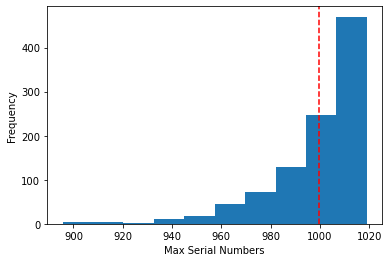

In [38]:
def mvue(sim):
    m = max(sim)
    gap = (m - k) / k
    return m + gap

mvue = [mvue(sim) for sim in sims]
plot_and_print(mvue)

The mean of the sample distribution is now exactly $n$, which proves how unbiased the second estimator is. However, notice that with less bias comes more variability (compare the variance of MVUE with MLE).

## Resampling Techniques

* **Bootstrapping** - A resampling method where small $n$-sized samples (with replacement) are repeatedly drawn a large number of times from a dataset. 
* **Normal resampling** - A special case of bootstrapping where sampling is done from a normal distribution.
* **Permutation resampling** - A sampling technique where labels on observed data points are rearranged. This is a resampling method without replacement that can be used for statistical significance tests. Used when dealing with an unknown distribution. 
* **Cross Validation** - When a subset of data is taken as the validation set (the rest is left for training). Used to validate a predictive model.